<a href="https://colab.research.google.com/github/SparkyGoLarky/SparkyGoLarky/blob/main/Image_Recognition_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(len(x_train))
print(len(x_test))
print(x_train[0])
print(y_train[0])

60000
10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 25

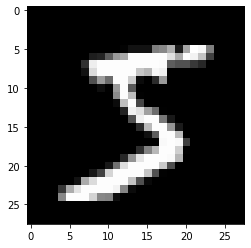

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

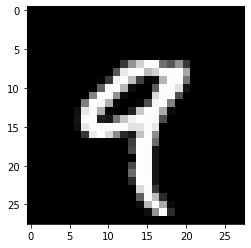

9


In [5]:
plt.imshow(x_train[4], cmap='gray')
plt.show()
print(y_train[4])

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train[0])
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [8]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Model

In [9]:
class MNISTModel(Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.dense1 = Dense(128, activation='relu')
    self.dense2 = Dense(10, activation='softmax')
  def call(self, x):
    x1 = self.conv1(x)
    x2 = self.flatten(x1)
    x3 = self.dense1(x2)
    return self.dense2(x3)
model = MNISTModel()

In [10]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimiser = tf.keras.optimizers.Adam()

In [11]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [12]:
@tf.function
def train_steps(inputs, labels):
  with tf.GradientTape() as gt:
    predictions = model(inputs)
    loss = loss_function(labels, predictions)
  gradients = gt.gradient(loss, model.trainable_variables)
  optimiser.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_accuracy(labels, predictions)

In [13]:
@tf.function
def test_steps(inputs, labels):
  predictions = model(inputs)
  loss = loss_function(labels, predictions)
  
  test_loss(loss)
  test_accuracy(labels, predictions)

In [15]:
epochs = 5
for epoch in range(epochs):
  for train_inputs, train_labels in train_data: 
    train_steps(train_inputs, train_labels)
  for test_inputs, test_labels in test_data: 
    test_steps(test_inputs, test_labels)
  template = "Epochs: {}, Train Loss: {}, Train Accuracy: {}, Test Loss: {}, Test Accuracy{}"
  print(template.format(
      epoch + 1,
      train_loss.result(),
      train_accuracy.result(),
      test_loss.result(),
      test_accuracy.result()
  ))
  train_loss.reset_states(),
  train_accuracy.reset_states(),
  test_loss.reset_states(),
  test_accuracy.reset_states()

Epochs: 1, Train Loss: 0.1052732914686203, Train Accuracy: 0.9682947397232056, Test Loss: 0.05812515318393707, Test Accuracy0.9804999828338623
Epochs: 2, Train Loss: 0.029688192531466484, Train Accuracy: 0.9908166527748108, Test Loss: 0.051471058279275894, Test Accuracy0.9828000068664551
Epochs: 3, Train Loss: 0.018318986520171165, Train Accuracy: 0.9940833449363708, Test Loss: 0.05814150720834732, Test Accuracy0.9825000166893005
Epochs: 4, Train Loss: 0.010398387908935547, Train Accuracy: 0.9965333342552185, Test Loss: 0.05980146676301956, Test Accuracy0.984000027179718
Epochs: 5, Train Loss: 0.009037596173584461, Train Accuracy: 0.9970666766166687, Test Loss: 0.06648817658424377, Test Accuracy0.9836000204086304
